### Support Vector Machine Algorithim

**Problem Statement:**

Our data is wine quality dataset. Wine is an alcoholic beverage made from fermented grapes. Yeast consumes the sugar in the grapes and converts it to ethanol, carbon dioxide, and heat. It is a pleasant tasting alcoholic beverage, loved celebrated . It will definitely be interesting to analyze the physicochemical attributes of wine and understand their relationships and significance with wine quality and types classifications. So our goal is to do the EDA on the dataset and to build a model to predict the quality of a wine based on different measurements using SVM algorithm.


In [1]:
# importing the libraly
import pandas as pd
wine_df = pd.read_csv("E:\Sankhyana Training\Datasets\svm-Wine Quality.csv")
wine_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:

#checking the size of teh dataset
wine_df.shape

(500, 13)

In [3]:
# getting thes ummary statistics
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,495.0,6.810909,0.730123,5.0000,6.3000,6.800,7.2000,10.200
volatile acidity,499.0,0.289309,0.106025,0.1000,0.2300,0.270,0.3300,0.905
citric acid,499.0,0.339279,0.120783,0.0000,0.2700,0.340,0.4000,0.880
residual sugar,498.0,6.690562,5.316258,0.8000,1.6000,5.400,10.5000,22.000
chlorides,499.0,0.047868,0.023349,0.0200,0.0380,0.045,0.0520,0.346
free sulfur dioxide,500.0,37.296000,16.856027,3.0000,25.7500,36.000,48.0000,131.000
total sulfur dioxide,500.0,146.605000,44.622560,47.0000,113.0000,147.000,176.2500,313.000
density,500.0,0.994450,0.002742,0.9892,0.9923,0.994,0.9969,1.001
pH,497.0,3.210040,0.146696,2.8700,3.1100,3.200,3.3100,3.720
sulphates,499.0,0.486112,0.102081,0.2700,0.4100,0.470,0.5400,0.850


In [7]:
# checking the data types of each column
wine_df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
# checking the null values
wine_df.isnull().sum()

type                    0
fixed acidity           5
volatile acidity        1
citric acid             1
residual sugar          2
chlorides               1
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      3
sulphates               1
alcohol                 0
quality                 0
dtype: int64

In [8]:
# using imutation to handle the missing values
wine_df1 = wine_df.fillna(wine_df['fixed acidity'].mean())

In [9]:
wine_df1.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
wine_df1.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
# checking the quality unique values
wine_df1.quality.value_counts()

quality
6    219
5    164
7     79
4     18
8     16
3      4
Name: count, dtype: int64

In [12]:
wine_df1["quality"].value_counts()

quality
6    219
5    164
7     79
4     18
8     16
3      4
Name: count, dtype: int64

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

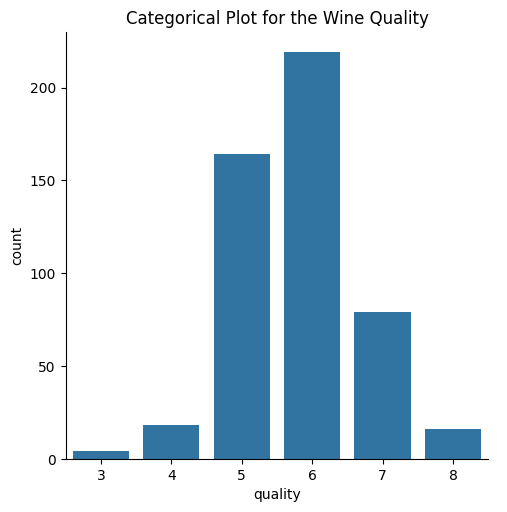

In [17]:
sns.catplot(x = 'quality', kind = "count", data = wine_df1 )
plt.title("Categorical Plot for the Wine Quality")
plt.show()

In [18]:
wine_df1.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


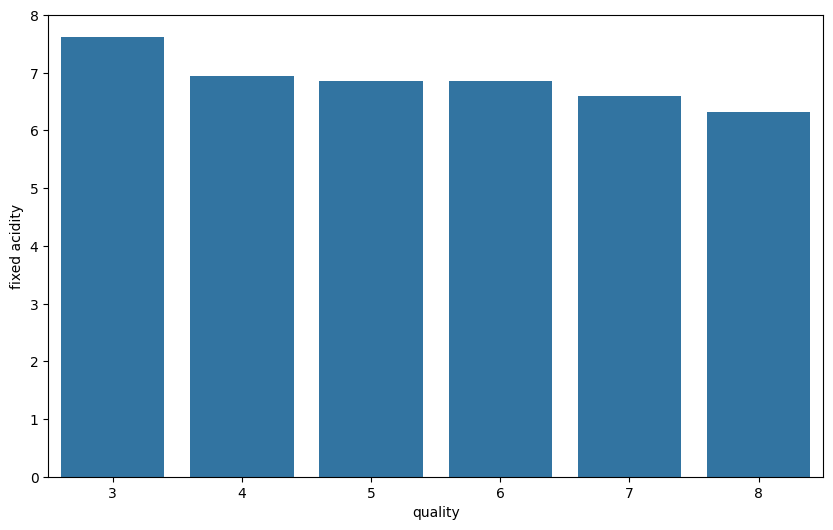

In [22]:
plt.figure (figsize=(10,6))
sns.barplot(x = "quality", y = "fixed acidity", data =wine_df1, errorbar = None)
plt.show()

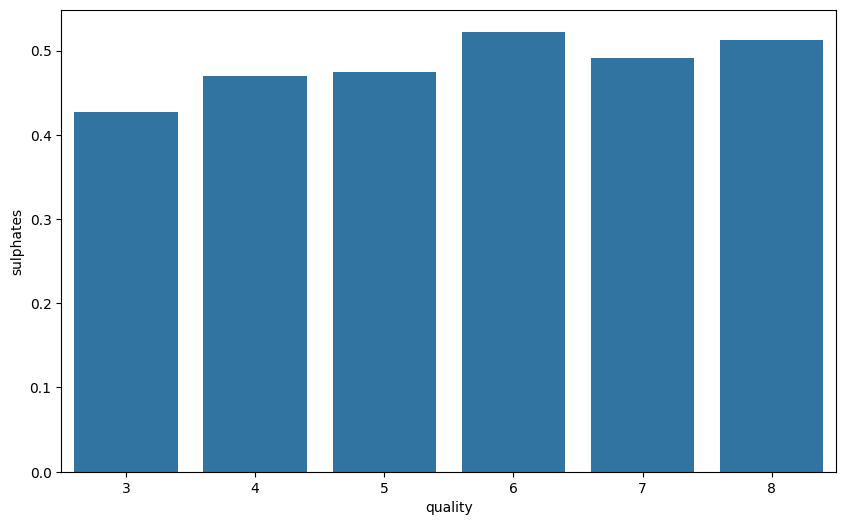

In [23]:
plt.figure (figsize=(10,6))
sns.barplot(x = "quality", y = "sulphates", data =wine_df1, errorbar = None)
plt.show()

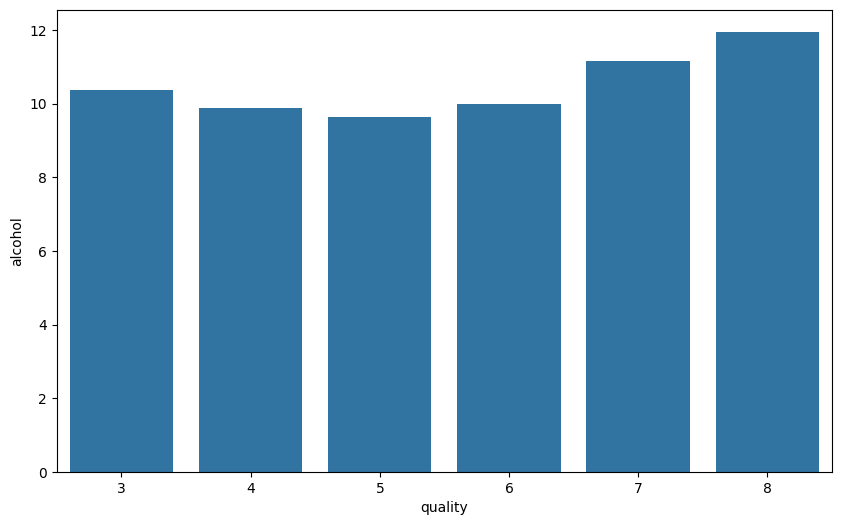

In [24]:
plt.figure (figsize=(10,6))
sns.barplot(x = "quality", y = "alcohol", data =wine_df1, errorbar = None)
plt.show()

In [26]:
wene_df2 = wine_df1.drop(columns = "type", axis =1)
wene_df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [27]:
# heatmap to check the correlation
corr_matrix = wene_df2.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.010862,0.050987,0.156250,0.184936,-0.005310,0.038836,0.264548,-0.210841,-0.052421,-0.139717,-0.163201
volatile acidity,-0.010862,1.000000,0.050857,0.036483,0.009202,-0.000727,0.027973,0.058487,-0.037878,0.027706,-0.082027,-0.063168
citric acid,0.050987,0.050857,1.000000,0.087467,0.015628,0.056387,0.044061,0.084826,-0.013948,-0.001052,-0.047018,0.008800
residual sugar,0.156250,0.036483,0.087467,1.000000,0.034131,0.395912,0.454094,0.893145,-0.222382,-0.052807,-0.526281,-0.275705
chlorides,0.184936,0.009202,0.015628,0.034131,1.000000,-0.067476,-0.047742,0.032215,-0.049967,-0.030849,-0.025653,-0.104756
free sulfur dioxide,-0.005310,-0.000727,0.056387,0.395912,-0.067476,1.000000,0.680185,0.421781,-0.116410,0.008056,-0.359350,-0.083975
total sulfur dioxide,0.038836,0.027973,0.044061,0.454094,-0.047742,0.680185,1.000000,0.543823,-0.149763,0.081152,-0.455012,-0.186957
density,0.264548,0.058487,0.084826,0.893145,0.032215,0.421781,0.543823,1.000000,-0.203099,-0.002334,-0.799966,-0.406809
pH,-0.210841,-0.037878,-0.013948,-0.222382,-0.049967,-0.116410,-0.149763,-0.203099,1.000000,0.046179,0.191548,0.162236
sulphates,-0.052421,0.027706,-0.001052,-0.052807,-0.030849,0.008056,0.081152,-0.002334,0.046179,1.000000,0.004546,0.042834


<Axes: >

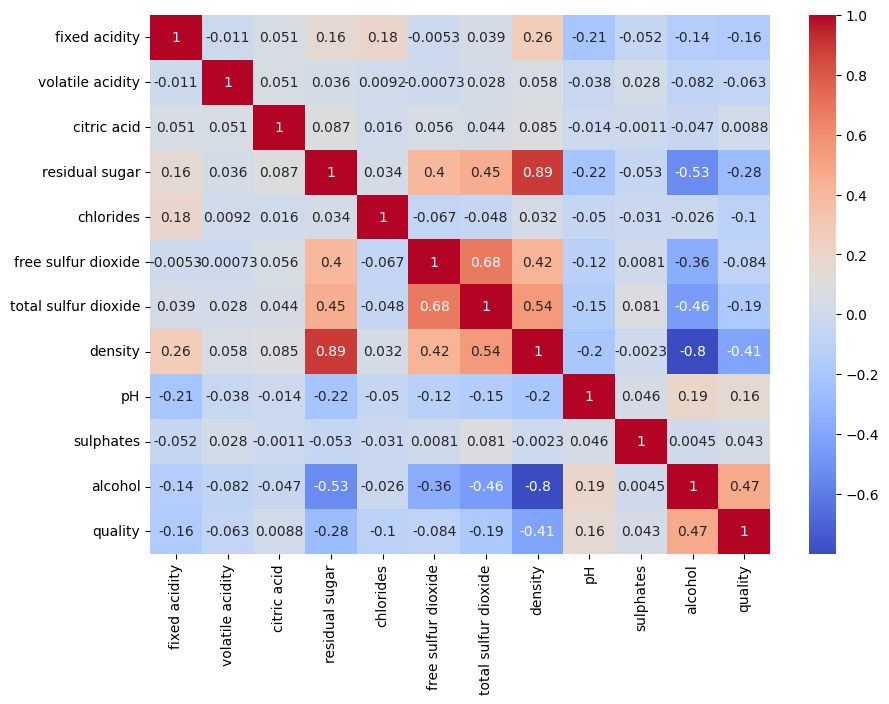

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(data =corr_matrix, annot = True, cmap = "coolwarm")

#### Feature selection

In [34]:
wene_df2.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [35]:
wene_df2.shape

(500, 12)

In [38]:
input_features = wene_df2.iloc[:, :11]
input_features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [41]:
target_feature = wene_df2.iloc[:, 11]
target_feature.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

#### splitting the dataset into training and testing sets

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(input_features,target_feature, train_size = 0.7, random_state = 42 )

In [72]:
X_train.shape

(350, 11)

In [73]:
# Training the machine learning model using Support Vector Machine
from sklearn.svm import SVC # import Support vector machine algorithm\
wine_quality_model = SVC()
wine_quality_model

SVC()

In [74]:
# Trining the modet
wine_quality_model.fit(X_train, Y_train)

SVC()

In [75]:
# Predicting the model accuracy

pred = wine_quality_model.predict(X_test)

In [76]:
from sklearn.metrics import *
accuracy_score(pred, Y_test)

0.42

In [ ]:
# wine_quality_model -> 9.0, 0.11, 0.9, 8.1, 0.66, 40, 140, 0.992,  3.01, 7.1